In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from imblearn.over_sampling import SMOTE
from collections import Counter
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier

import warnings
warnings.filterwarnings("ignore")

In [20]:
df = pd.read_csv('Customer_Dataset.csv')

In [21]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.50,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [22]:
df.drop('customerID', axis=1, inplace=True)

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [24]:
df.isnull().sum()

,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0
OnlineBackup,0


###The dataset is mostly clean with no missing values in categorical or numeric columns, except for the TotalCharges column, which has 11 missing entries. These can be handled by either filling them (e.g., with median/mean) or dropping those rows to ensure consistency in model training.

In [25]:
df.TotalCharges.unique()

array([  29.85, 1889.5 ,  108.15, ...,  346.45,  306.6 , 6844.5 ])

In [26]:
df.TotalCharges = df.TotalCharges.replace(' ', np.nan)
df.TotalCharges.fillna(df.TotalCharges.median(), inplace=True)

In [27]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


In [28]:
df.select_dtypes(include='object').columns

Index(['gender', 'Partner', 'Dependents', 'PhoneService', 'MultipleLines',
       'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection',
       'TechSupport', 'StreamingTV', 'StreamingMovies', 'Contract',
       'PaperlessBilling', 'PaymentMethod', 'Churn'],
      dtype='object')

In [29]:
print(df.InternetService.unique())
print(df.Contract.unique())
print(df.PaymentMethod.unique())

['DSL' 'Fiber optic' 'No']
['Month-to-month' 'One year' 'Two year']
['Electronic check' 'Mailed check' 'Bank transfer (automatic)'
 'Credit card (automatic)']


In [30]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


####This chart shows the distribution of churn in our dataset. We can see that the majority of customers did not churn, while a smaller proportion did. This imbalance means churn prediction is a bit challenging, as the classes are not evenly distributed.

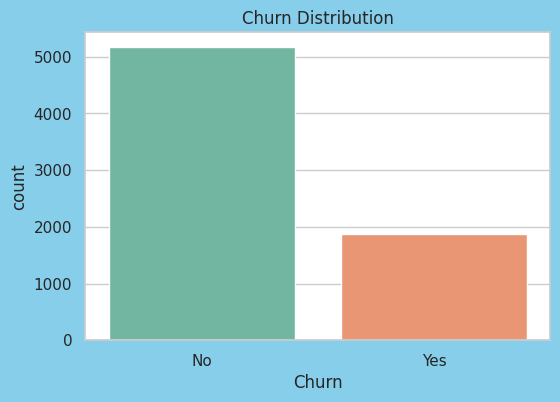

In [31]:
plt.figure(figsize=(6,4), facecolor= 'skyblue')
sns.set(style="whitegrid")
sns.countplot(x="Churn", data=df, palette="Set2")
plt.title("Churn Distribution")
plt.show()

####When comparing churn across genders, the rates appear quite similar. This suggests that gender does not play a major role in customer churn.

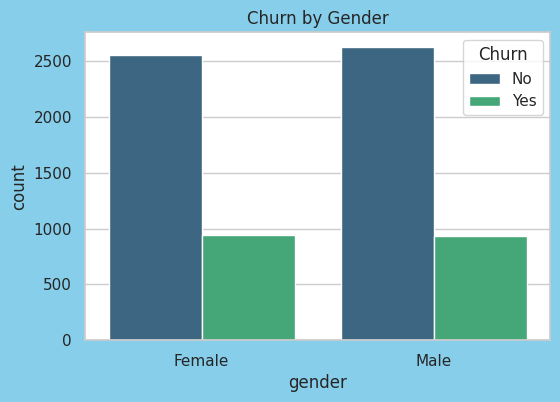

In [32]:
plt.figure(figsize=(6,4), facecolor= 'skyblue')
sns.countplot(x="gender", hue="Churn", data=df, palette="viridis")
plt.title("Churn by Gender")
plt.show()


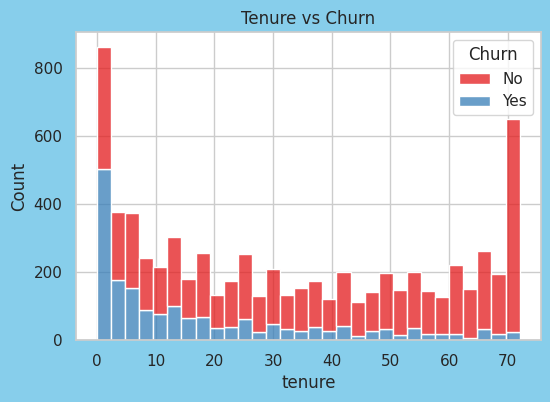

In [33]:
plt.figure(figsize=(6,4), facecolor= 'skyblue')
sns.histplot(x="tenure", hue="Churn", data=df, multiple="stack", bins=30, palette="Set1")
plt.title("Tenure vs Churn")
plt.show()


####Customers with a shorter tenure are much more likely to churn, while long-term customers tend to stay. This shows that customer loyalty increases the longer they remain with the company.

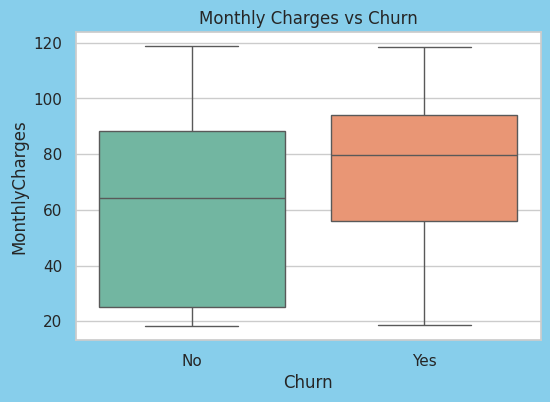

In [34]:
plt.figure(figsize=(6,4), facecolor= 'skyblue')
sns.boxplot(x="Churn", y="MonthlyCharges", data=df, palette="Set2")
plt.title("Monthly Charges vs Churn")
plt.show()


####Customers who churn generally have higher monthly charges compared to those who stay. This indicates that expensive plans may contribute to churn.

In [35]:
df.gender = df.gender.map({'Female': 0, 'Male': 1})

several service-related columns such as MultipleLines, OnlineSecurity, OnlineBackup, DeviceProtection, TechSupport, StreamingTV, and StreamingMovies contained three categories: "Yes", "No", and "No internet service"/"No phone service".

---




These extra categories in  (“No internet service”, “No phone service”) aren’t real separate features.


In [36]:
cols = ["MultipleLines", "OnlineSecurity", "OnlineBackup",
        "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies"]

for col in cols:
    df[col] = df[col].replace({'No internet service': 'No', 'No phone service': 'No'})

In [37]:
Binary_data_cols = ["Partner","Dependents","PhoneService","MultipleLines", "OnlineSecurity", "OnlineBackup",
        "DeviceProtection", "TechSupport", "StreamingTV", "StreamingMovies", "PaperlessBilling", "Churn"]

for col in Binary_data_cols:
  df[col] = df[col].map({'Yes': 1, 'No': 0})

##These are the feature having different categories: For converting it into the number I use One-Hot-Encoding(OHE).

In [38]:
df = pd.get_dummies(df, columns=['InternetService', 'Contract', 'PaymentMethod'], drop_first=True)

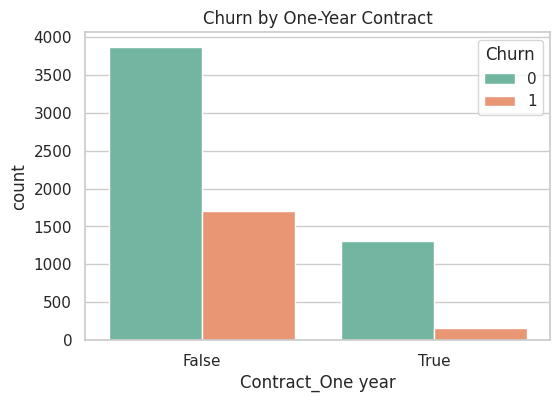

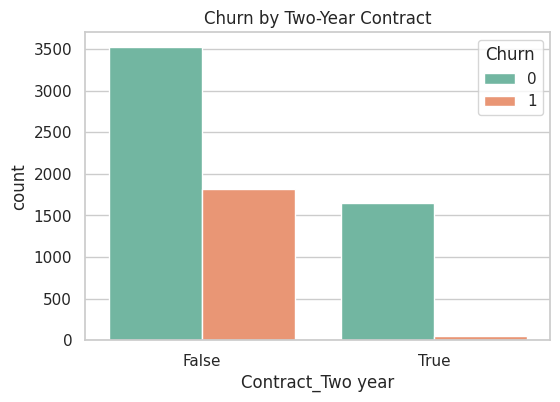

In [39]:
plt.figure(figsize=(6,4))
sns.countplot(x="Contract_One year", hue="Churn", data=df, palette="Set2")
plt.title("Churn by One-Year Contract")
plt.show()

plt.figure(figsize=(6,4))
sns.countplot(x="Contract_Two year", hue="Churn", data=df, palette="Set2")
plt.title("Churn by Two-Year Contract")
plt.show()

####Customers on month-to-month contracts have the highest churn rate, while those on one-year or two-year contracts churn much less. This shows that long-term contracts help reduce customer chur

In [40]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                                 Non-Null Count  Dtype  
---  ------                                 --------------  -----  
 0   gender                                 7043 non-null   int64  
 1   SeniorCitizen                          7043 non-null   int64  
 2   Partner                                7043 non-null   int64  
 3   Dependents                             7043 non-null   int64  
 4   tenure                                 7043 non-null   int64  
 5   PhoneService                           7043 non-null   int64  
 6   MultipleLines                          7043 non-null   int64  
 7   OnlineSecurity                         7043 non-null   int64  
 8   OnlineBackup                           7043 non-null   int64  
 9   DeviceProtection                       7043 non-null   int64  
 10  TechSupport                            7043 non-null   int64  
 11  Stre

In [41]:
X = df.drop('Churn', axis=1)
y = df.Churn

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((5634, 23), (1409, 23), (5634,), (1409,))

In [44]:
class_distribution = df.Churn.value_counts() / len(df)

In [45]:
print(f'{class_distribution * 100}')

Churn
0    73.463013
1    26.536987
Name: count, dtype: float64




```
73.46% of customers did not churn (Churn = 0)
26.54% of customers churned (Churn = 1)
```
####This is class imbalance, where the majority class is 'No churn'. This can impact the performance of the model(They might get high accuracy just by predicting the majority class).






In [46]:
#Scaling the dataset
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [47]:
# Applying SMOTE
smote = SMOTE(random_state=42)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [48]:
# Check new class distribution
from collections import Counter
print("Original class distribution:", Counter(y_train))
print("Resampled class distribution:", Counter(y_train_resampled))

Original class distribution: Counter({0: 4138, 1: 1496})
Resampled class distribution: Counter({0: 4138, 1: 4138})


##**LOGISTIC REGRESSION: -**

In [49]:
lr = LogisticRegression()
lr.fit(X_train_resampled, y_train_resampled)

LogisticRegression()

In [50]:
y_pred = lr.predict(X_test)

In [51]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
confusion = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.7551454932576295
Confusion Matrix:
[[753 283]
 [ 62 311]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



##**Random Forest:-**


In [52]:
rf = RandomForestClassifier()
rf.fit(X_train_resampled, y_train_resampled)

RandomForestClassifier()

In [53]:
y_pred1 = rf.predict(X_test)

In [54]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
confusion = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.7551454932576295
Confusion Matrix:
[[753 283]
 [ 62 311]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



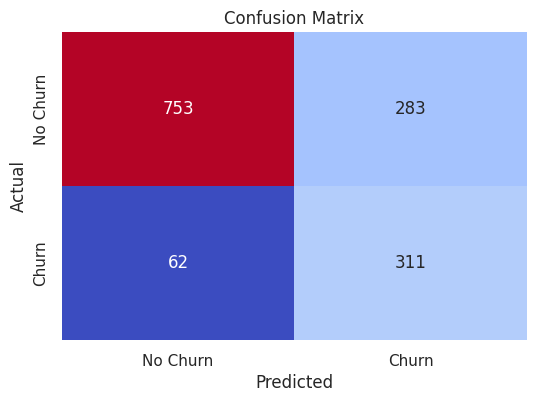

In [55]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion, cmap="coolwarm", annot = True, fmt = 'd', cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["No Churn", "Churn"])
plt.yticks([0.5, 1.5], ["No Churn", "Churn"])
plt.show()

##**XGBoost:-**

In [56]:
model = XGBClassifier(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=5,
    random_state=42
)

model.fit(X_train_resampled, y_train_resampled)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              feature_weights=None, gamma=None, grow_policy=None,
              importance_type=None, interaction_constraints=None,
              learning_rate=0.1, max_bin=None, max_cat_threshold=None,
              max_cat_to_onehot=None, max_delta_step=None, max_depth=5,
              max_leaves=None, min_child_weight=None, missing=nan,
              monotone_constraints=None, multi_strategy=None, n_estimators=100,
              n_jobs=None, num_parallel_tree=None, ...)

In [57]:
y_pred2= model.predict(X_test)

In [58]:
print(f'Accuracy: {accuracy_score(y_test, y_pred)}')
confusion = confusion_matrix(y_test, y_pred)
print(f'Confusion Matrix:\n{confusion}')
print(f'Classification Report:\n{classification_report(y_test, y_pred)}')

Accuracy: 0.7551454932576295
Confusion Matrix:
[[753 283]
 [ 62 311]]
Classification Report:
              precision    recall  f1-score   support

           0       0.92      0.73      0.81      1036
           1       0.52      0.83      0.64       373

    accuracy                           0.76      1409
   macro avg       0.72      0.78      0.73      1409
weighted avg       0.82      0.76      0.77      1409



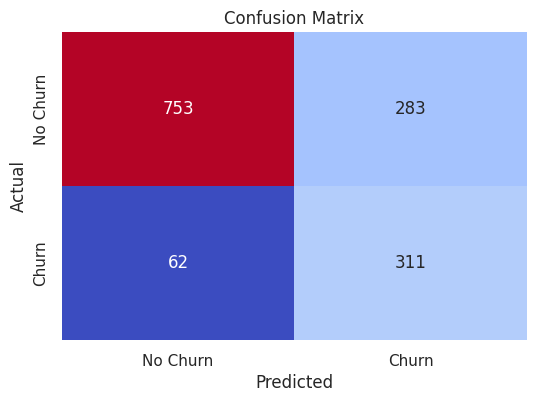

In [59]:
plt.figure(figsize=(6,4))
sns.heatmap(confusion, cmap="coolwarm", annot = True, fmt = 'd', cbar = False)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.xticks([0.5, 1.5], ["No Churn", "Churn"])
plt.yticks([0.5, 1.5], ["No Churn", "Churn"])
plt.show()

##**Model Comparision**:-

####During implementation, all models (Logistic Regression, Random Forest, and XGBoost) produced very similar results after applying SMOTE balancing and scaling. This indicates that the dataset’s signal is quite strong and models converge to similar performance.

####Logistic Regression achieved ~76% accuracy with good recall (83% for churn class). More complex models like Random Forest and XGBoost did not show significant improvement. Therefore, Logistic Regression was chosen as the final model due to its simplicity and interpretability.


##**Buisness Conclusion:-**
    1. Tenure matters:- Customers with shorter tenure are far more likely to churn.
    2. Pricing Impact:- Customers paying higher monthly charges showed a higher probablity of churn.
    3. Contract Type influence:- Month-to-Month contracts, Encouraging customers to move to longer-term contracts thorugh discounts or added benefits could reduce churn.